### Importing Libraries and reading datasets

In [ ]:
pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 15.8 MB/s 
     |████████████████████████████████| 76 kB 2.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from uszipcode import SearchEngine



%matplotlib inline

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

rating_df = pd.read_csv('/content/gdrive/MyDrive/Datamining/ml-100k/u.data', sep='\t', 
                        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
                        parse_dates=['timestamp'], 
                        date_parser=dateparse)

movie_df = pd.read_csv('/content/gdrive/MyDrive/Datamining/ml-100k/u.item', sep='|', encoding='latin-1',
                    names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 
                           'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
                           'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'])

user_df = pd.read_csv('/content/gdrive/MyDrive/Datamining/ml-100k/u.user', sep='|', encoding='latin-1',
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [ ]:
movie_df.sample(10)

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
1363,1364,Bird of Prey (1996),04-Oct-1996,NaN,http://us.imdb.com/M/title-exact?Bird%20of%20P...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,439,Amityville: A New Generation (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Amityville:%2...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1142,1143,Hard Eight (1996),28-Feb-1997,NaN,http://us.imdb.com/Title?Hard+Eight+(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1396,1397,Of Human Bondage (1934),01-Jan-1934,NaN,http://us.imdb.com/M/title-exact?Of%20Human%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1078,1079,Joe's Apartment (1996),26-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Joe's%20Apart...,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
294,295,Breakdown (1997),02-May-1997,NaN,http://us.imdb.com/M/title-exact?Breakdown%20%...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
55,56,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542,543,"Misérables, Les (1995)",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Mis%E9rables%...,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
572,573,Body Snatchers (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Body%20Snatch...,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
830,831,Escape from L.A. (1996),09-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Escape%20from...,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


### Exploring 'item_df' - 

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film_noir           1682 non-null   int64  
 16  horror

In [ ]:
movie_df.sample(6)

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
653,654,Chinatown (1974),01-Jan-1974,NaN,http://us.imdb.com/M/title-exact?Chinatown%20(...,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1320,1321,Open Season (1996),10-May-1996,NaN,http://us.imdb.com/Title?Open+Season+(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,185,Psycho (1960),01-Jan-1960,NaN,http://us.imdb.com/M/title-exact?Psycho%20(1960),0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
11,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1377,1378,Rhyme & Reason (1997),05-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Rhyme%20%26%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,407,Spy Hard (1996),24-May-1996,NaN,http://us.imdb.com/M/title-exact?Spy%20Hard%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_df.describe()

,movie_id,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
    1. video_release_date seems containing lots of NaN values.
    2. release_date needs to be parsed to datetime.
    3. imdb_url contains external links which is not usefull here anyways.

In [ ]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)

### Checkout NaN values percent in each column

In [ ]:
def check_nan_percent(df):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame({'null_percent': (columns_null_count/df.shape[0])*100, 'total_null': columns_null_count})
    return null_percent_df[null_percent_df.null_percent>0]

In [ ]:
check_nan_percent(movie_df)

,null_percent,total_null
release_date,0.059453,1
video_release_date,100.000000,1682
imdb_url,0.178359,3


Clearly video_release_date contains nothing and imdb_url is of no use, lets remove them. In release_date we have only null value, if we remove entire row, then it will cost us one missing movie_id which is not good. So lets fill it with mode value of same column, since this approach is not gonna harm much.

In [ ]:
movie_df.drop(columns=['video_release_date', 'imdb_url'], inplace=True)
movie_df.release_date.fillna(value=movie_df.release_date.mode()[0], inplace=True)

check_nan_percent(movie_df)

,null_percent,total_null


### Exploring rating_df

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [ ]:
rating_df.sample(6)

,user_id,movie_id,rating,timestamp
93767,391,23,4,1997-10-21 01:56:32
22569,207,224,3,1998-01-09 22:54:33
44782,200,582,4,1998-01-06 23:36:22
37512,566,1044,3,1997-12-09 07:13:03
49721,476,692,3,1997-12-29 02:55:43
81710,472,265,4,1998-04-17 05:24:36


In [ ]:
rating_df.describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


Observations:
    1. Everything seems all ok.

#### Check missing values

In [ ]:
check_nan_percent(rating_df)

,null_percent,total_null


perfect, we don't have any missing value.

### Exploring user_df

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
user_df.sample(6)

,user_id,age,gender,occupation,zip_code
577,578,31,M,administrator,M7A1A
881,882,35,M,engineer,40503
440,441,50,M,technician,55013
142,143,42,M,technician,08832
156,157,57,M,engineer,70808
882,883,49,M,librarian,50266


Zip codes can be converted to city names, let's do that, and later we can use it for some additional analysis.

In [ ]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### Check missing values

In [ ]:
check_nan_percent(user_df)

,null_percent,total_null


If you notice at various places, we have used word age group, which is not already there, so lets go ahead and create one additional categorical feature in user_df called __age_group__. Minimum age is 7 and maximum age is 73 so we should have following divisions:

* 5-12   -  Gradeschooler
* 13-19  -  Teenager
* 20-35  -  Young
* 35-55  -  Midlife
* above 55    -  Old

In [ ]:
user_df['age_group'] = user_df.age.apply(lambda age: 'Gradeschooler' if 5<=age<=12 else ('Teenager' if 13<=age<=19 else ('Young' if 20<=age<=35 else ('Midlife' if 35<=age<=55 else 'Old'))))
user_df.sample(5)

,user_id,age,gender,occupation,zip_code,age_group
467,468,28,M,engineer,02341,Young
601,602,47,F,other,34656,Midlife
888,889,24,M,technician,78704,Young
101,102,38,M,programmer,30220,Midlife
492,493,22,M,engineer,60090,Young


Lets also create joined DataFrames, they will be helpful later.

In [ ]:
rating_user_df = rating_df.join(other=user_df, how='inner', on='user_id', lsuffix='_R')
rating_user_movie_df = rating_user_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')
rating_movie_df = rating_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')

### <a id='QA1'>What are common genere of movies?</a>

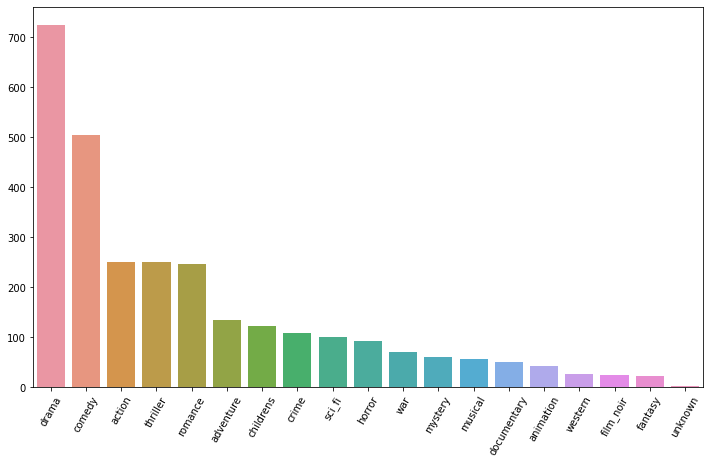

In [ ]:
generes = ['unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery',
       'romance', 'sci_fi', 'thriller', 'war', 'western']

plt.figure(figsize=(12,7))
genere_counts = movie_df.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60);

drama and comedy are the most common genere type. We must also note that it can not be a clear indication of people's preference, because One movie can have more than one genere and drama is the most commor genere type.

### <a id="QA2">How many movies got released each year and month?</a>

Yearly release

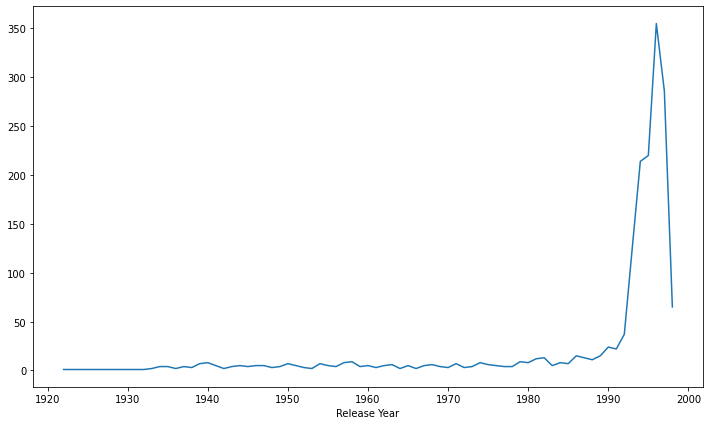

In [ ]:
plt.figure(figsize=(12,7))
yearly_release_counts = movie_df.groupby(movie_df.release_date.dt.year).size().sort_values(ascending=False);
sns.lineplot(x=yearly_release_counts.index,y=yearly_release_counts.values);
plt.xlabel('Release Year');

#release significantly increased after 80s, however it doesn't exactly depicts the actual number of release, but the number of rated release, actual number of release must be far greater than what we have. Anyway, one thing is clear that people mostly watched movies released in 90s. There is a sudden fall in 1998's record, that might be because of incomplete record.

Since there is not much record available for movies before 90s, so I will consider release count for months in 90s only.

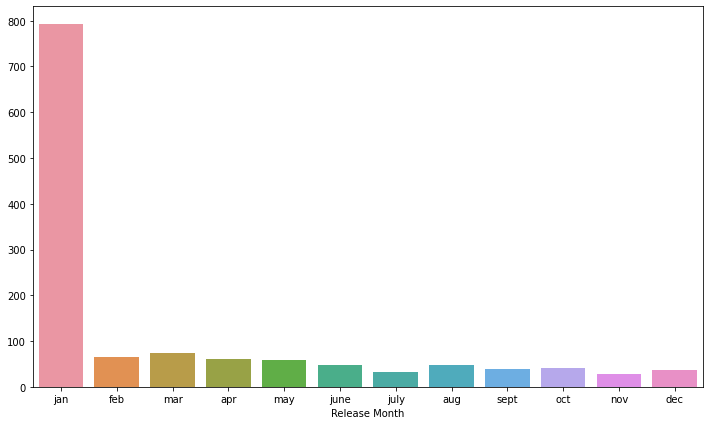

In [ ]:
plt.figure(figsize=(12,7))
monthly_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.month).size()
sns.barplot(x=['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], y=monthly_release_counts.values);
plt.xlabel('Release Month');

this is weird, rated movie rlease count in Jan month is too high as cmpare to other months. Dataset creators must have considered Jan 1st as the default release month and date.

### <a id="QA3">What is the prefferable week of month to release movies?</a>

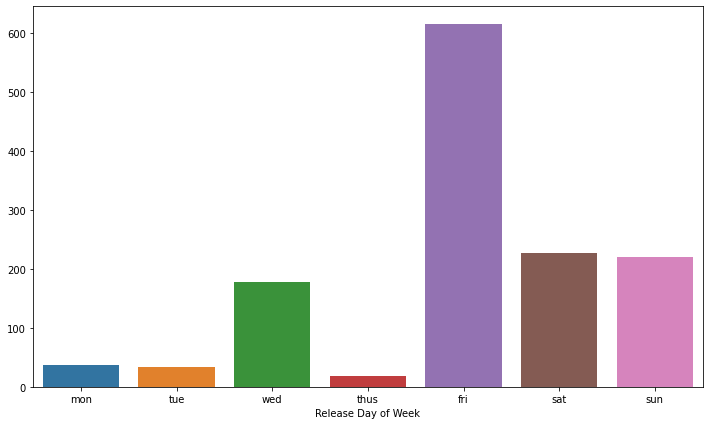

In [ ]:
plt.figure(figsize=(12,7))
weekday_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.dayofweek).size()
sns.barplot(x=['mon', 'tue', 'wed', 'thus', 'fri', 'sat', 'sun'], y=weekday_release_counts.values);
plt.xlabel('Release Day of Week');

This trend seems fine. Mostly rated movies got released on Friday, and then on weekends.

### <a id='QB1'>Who watches more movies Men/Women?</a>

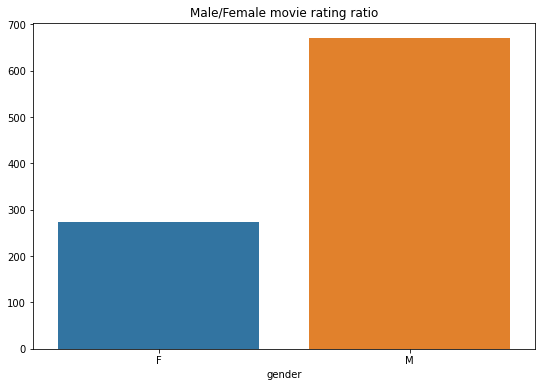

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x=user_df.groupby('gender').size().index, y=user_df.groupby('gender').size().values)
plt.title('Male/Female movie rating ratio');

Male, of course ;)
or may be mostly Male takes interest in rating movies.

### <a id='QB2'>What age group watches more movies?</a>

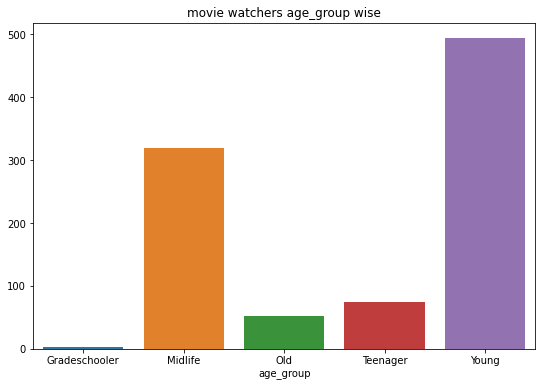

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x=user_df.groupby('age_group').size().index, y=user_df.groupby('age_group').size().values)
plt.title('movie watchers age_group wise');

Obviously Gradeschoolers and Teenagers don't have that much of time and old people don't have much interestest. Youngesters are the ones who watches movies mostly and prefers rating them. So overall people from age 20 - 55 watches more movies.

### <a id='QB3'>Which kind of occupant watches more movies?</a>

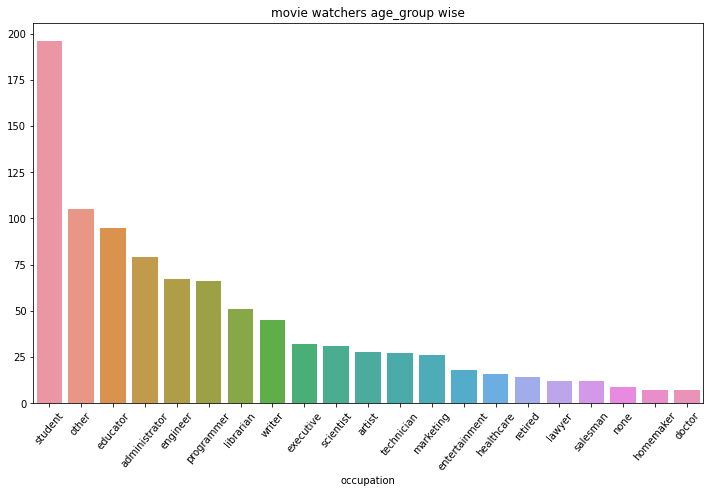

In [ ]:
plt.figure(figsize=(12,7))
movie_watcher_occupants = user_df.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(x=movie_watcher_occupants.index, y=movie_watcher_occupants.values)
plt.title('movie watchers age_group wise')
plt.xticks(rotation=50);

It appears that Students watches more movies, may be the ones who are above 20 means Young students. Irony is that people who are in entertainment don't watch or may rate movies. Lets explore it bit more.

In [ ]:
pd.DataFrame(user_df.groupby(['occupation', 'age_group']).size().sort_values(ascending=False))

0
occupation age_group         
student    Young          128
           Teenager        62
other      Young           59
educator   Midlife         51
programmer Young           45
...                       ...
artist     Teenager         1
none       Gradeschooler    1
salesman   Teenager         1
retired    Midlife          1
none       Midlife          1

[62 rows x 1 columns]

From above dataframe it is clear that Young students are more interested in movies. After that Midelife people in any profession seems interested too.

### <a id='QC1'>What gender likes which kind of genere</a>

In [ ]:
temp_df = rating_user_movie_df.groupby('gender').sum().loc[:,generes]
temp_df = temp_df.transpose()
temp_df

gender,F,M
unknown,12,26
action,6297,14761
adventure,3451,8256
animation,1143,2665
childrens,2433,5809
comedy,9437,22131
crime,2342,5429
documentary,526,1188
drama,11523,27333
fantasy,407,1025


Stacked Bar Chart-

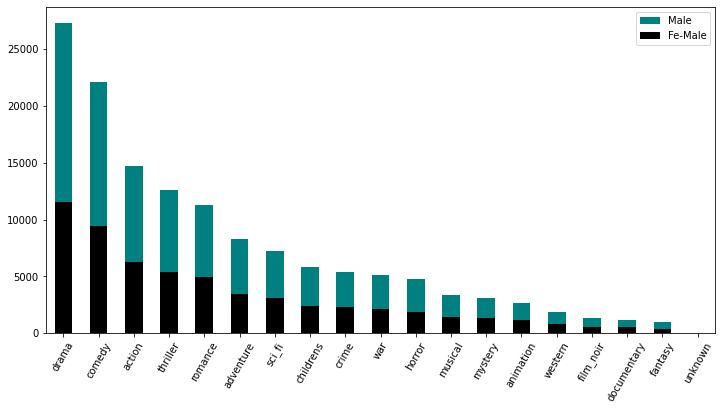

In [ ]:
plt.figure(figsize=(12, 6))

temp_df.M.sort_values(ascending=False).plot(kind='bar', color='teal', label="Male")
temp_df.F.sort_values(ascending=False).plot(kind='bar', color='black', label="Fe-Male")
plt.legend()
plt.xticks(rotation=60)
plt.show()

Multi Car Chart - 

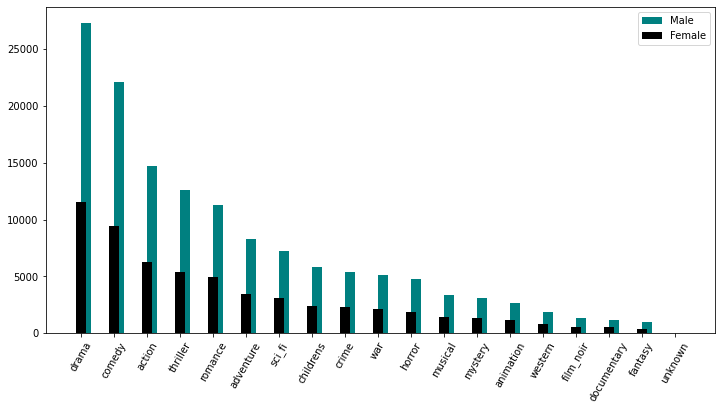

In [ ]:
plt.figure(figsize=(12, 6))
m_temp_df = temp_df.M.sort_values(ascending=False)
f_temp_df = temp_df.F.sort_values(ascending=False)

plt.bar(x=m_temp_df.index, height=m_temp_df.values, label="Male", align="edge", width=0.3, color='teal')
plt.bar(x=f_temp_df.index, height=f_temp_df.values, label="Female", width=0.3, color='black')
plt.legend()
plt.xticks(rotation=60)
plt.show()

### <a id='QC2'>What age group watches which kind of movies?</a>

### <a id='QC3'>Are movie lover's increasing over time</a>

####      <a id='QC3a'>Overall</a>

In [ ]:
rating_df.groupby(rating_df.timestamp.dt.year).size()

timestamp
1997    52899
1998    47101
dtype: int64

We have rating record for only two years. Which is not enought for this observation.

####      <a id='QC3b'>Gender wise</a>

In [ ]:
rating_user_df.groupby([rating_user_df.timestamp.dt.year, 'gender']).size()

timestamp  gender
1997       F         18311
           M         34550
1998       F         11474
           M         35497
dtype: int64

We don't have enough record in ratings dataset

####      <a id='QC3c'>Age group wise</a>

In [ ]:
rating_user_df.groupby([rating_user_df.timestamp.dt.year, 'age_group']).size()

timestamp  age_group    
1997       Gradeschooler       91
           Midlife          18482
           Old               2439
           Teenager          4459
           Young            27390
1998       Gradeschooler       75
           Midlife          18020
           Old               2832
           Teenager          3453
           Young            22591
dtype: int64

We don't have enough record in ratings dataset

### <a id='QD1'>How much rating people give mostly.</a>

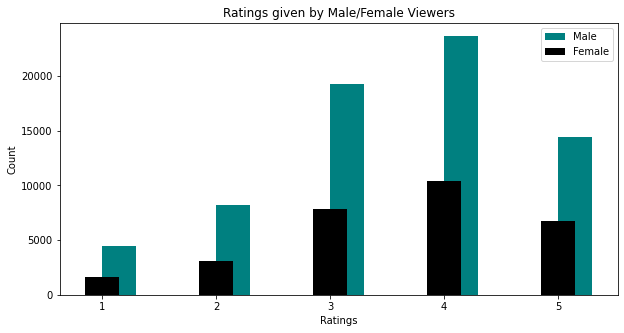

In [ ]:
temp_df = rating_user_df.groupby(['gender', 'rating']).size()
plt.figure(figsize=(10, 5))
m_temp_df = temp_df.M.sort_values(ascending=False)
f_temp_df = temp_df.F.sort_values(ascending=False)

plt.bar(x=m_temp_df.index, height=m_temp_df.values, label="Male", align="edge", width=0.3, color='teal')
plt.bar(x=f_temp_df.index, height=f_temp_df.values, label="Female", width=0.3, color='black')
plt.title('Ratings given by Male/Female Viewers')
plt.legend()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Viewers gave mostly 4 start rating then 3 and then 5

### <a id='QD2'>Most Rated Movies</a>

####      <a id='QD2a'>during all years</a>

In [ ]:
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(12, 7))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

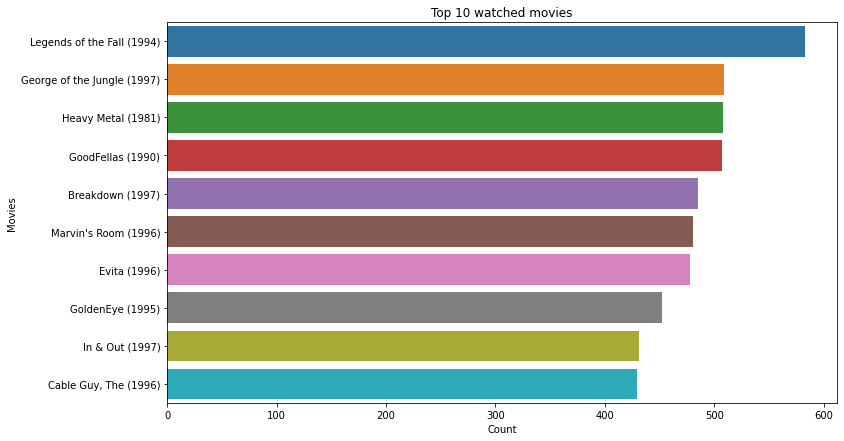

In [ ]:
top_ten_rated_movies = rating_movie_df.groupby('movie_id').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = movie_df.iloc[top_ten_rated_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_movie_titles.values, top_ten_rated_movies.values, 'Top 10 watched movies')

####      <a id='QD2c'>gender wise</a>

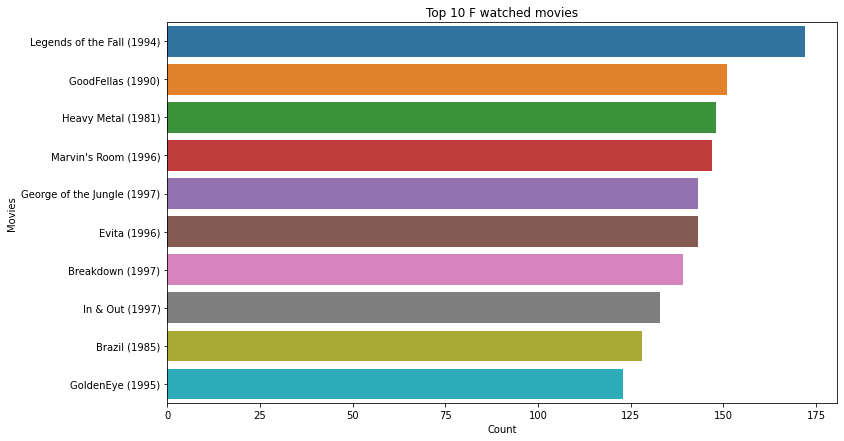

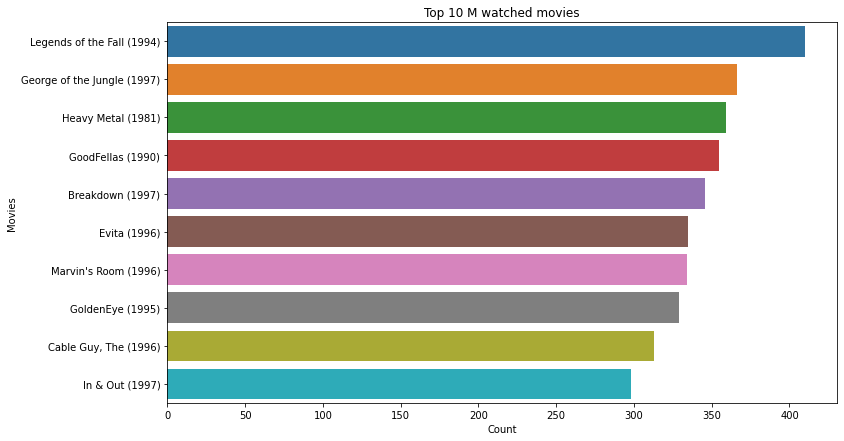

In [ ]:
top_rated_movies_gender_wise = rating_user_movie_df.groupby(['gender','movie_id']).size()

for index_label in top_rated_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_rated_movies = top_rated_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = movie_df.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 {index_label} watched movies')

####      <a id='QD2d'>age group wise</a>

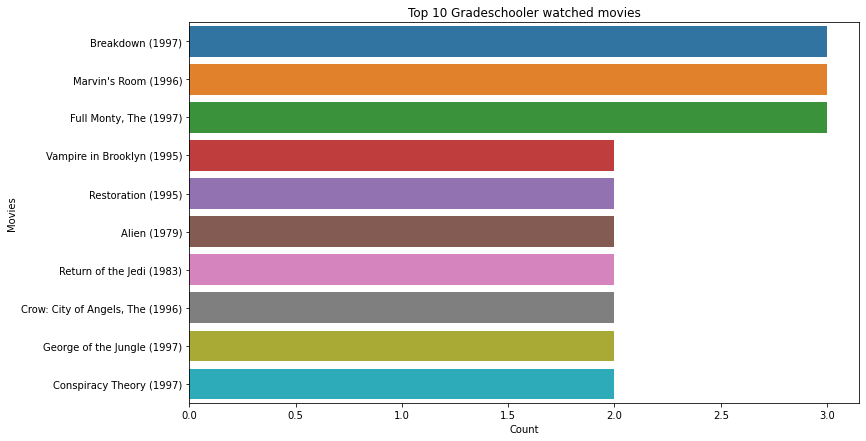

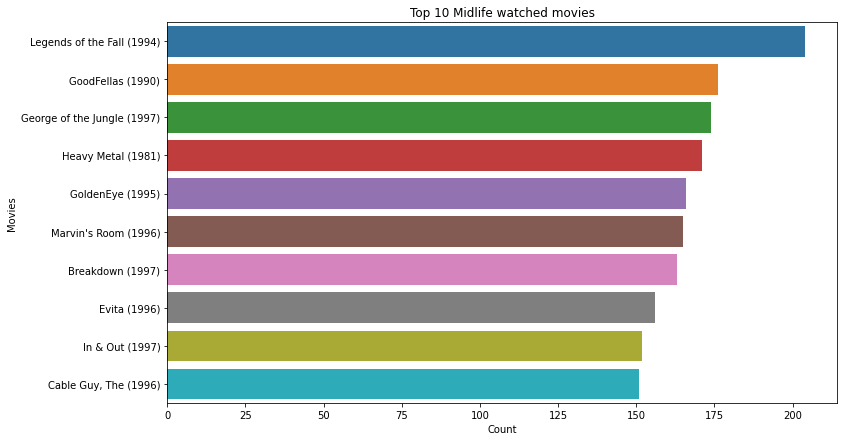

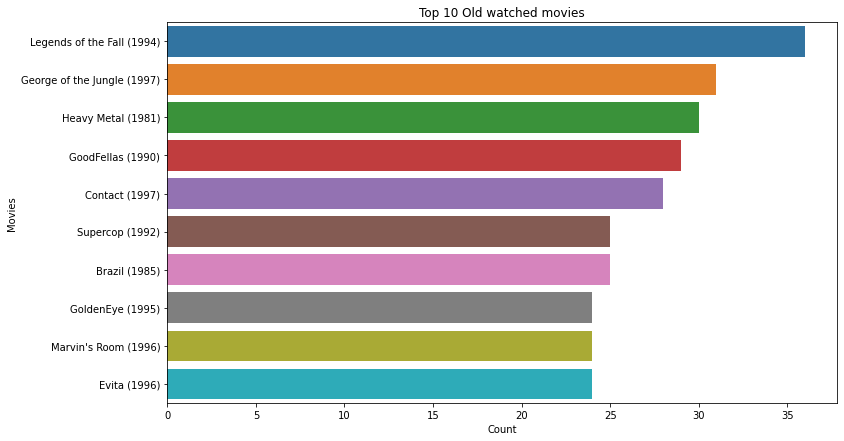

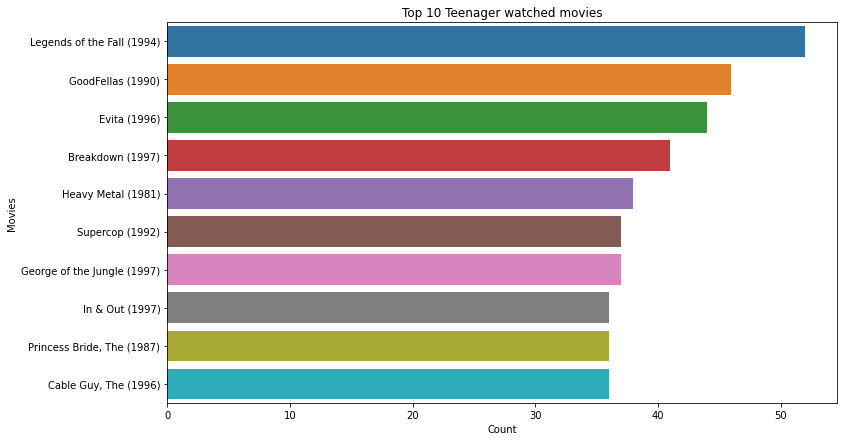

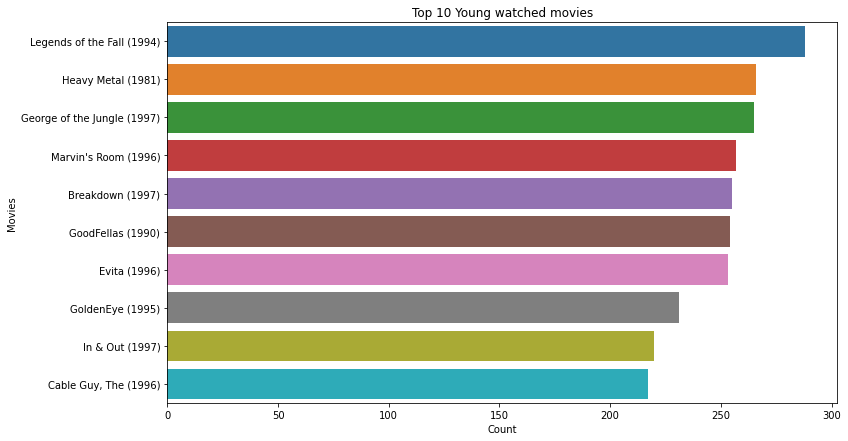

In [ ]:
top_rated_movies_age_group_wise = rating_user_movie_df.groupby(['age_group','movie_id']).size()

for index_label in top_rated_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_rated_movies = top_rated_movies_age_group_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = movie_df.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 {index_label} watched movies')

Mostly movies are same for all user kinds, may be because of limited record we have in our ratings dataset

### <a id='QD3'>Most Loved Movies</a>

####      <a id='QD3a'>during all years</a>

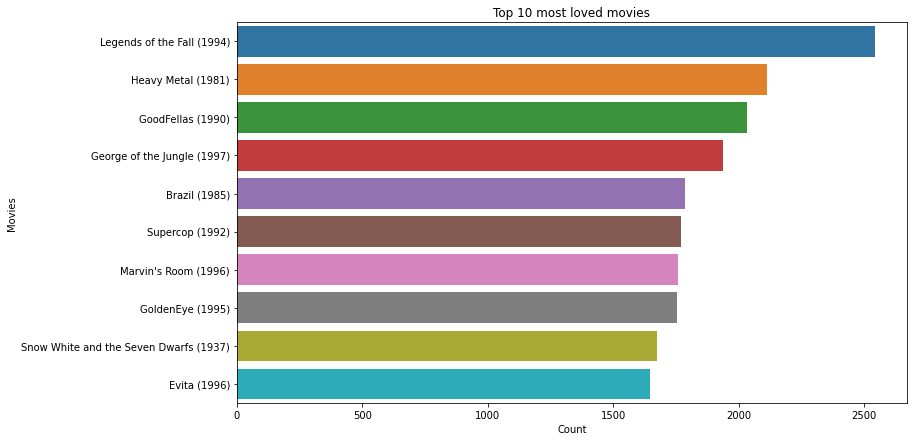

In [ ]:
top_ten_most_loved_movies = rating_movie_df.groupby('movie_id').sum().rating.sort_values(ascending=False)[:10]
top_ten_most_loved_movie_titles = movie_df.iloc[top_ten_most_loved_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_most_loved_movie_titles.values, top_ten_most_loved_movies.values, 'Top 10 most loved movies')

####      <a id='QD3c'>gender wise</a>

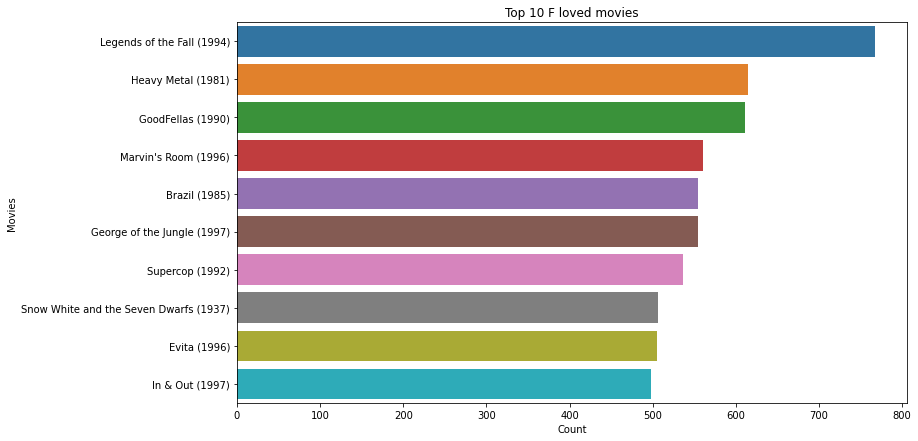

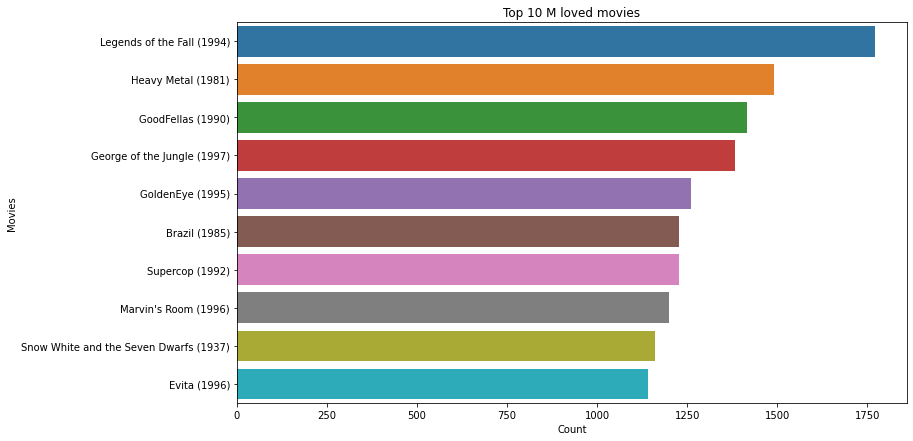

In [ ]:
most_loved_movies_gender_wise = rating_user_movie_df.groupby(['gender','movie_id']).sum().rating

for index_label in most_loved_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_loved_movies = most_loved_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = movie_df.iloc[top_10_userkind_loved_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 {index_label} loved movies')

####      <a id='QD3d'>age group wise</a>

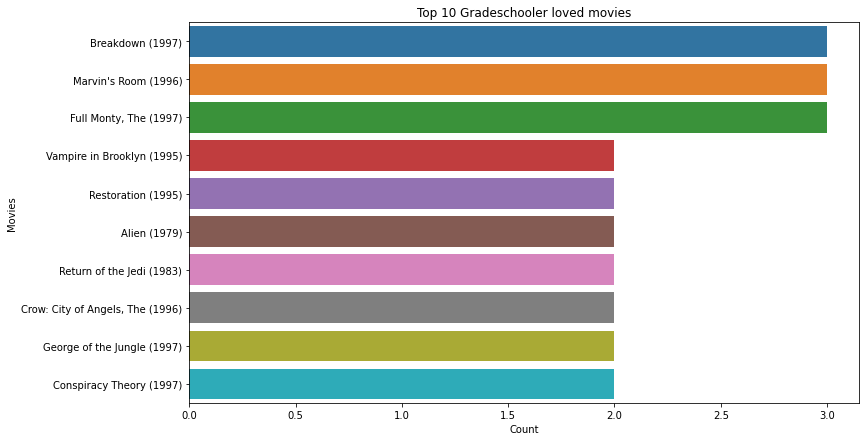

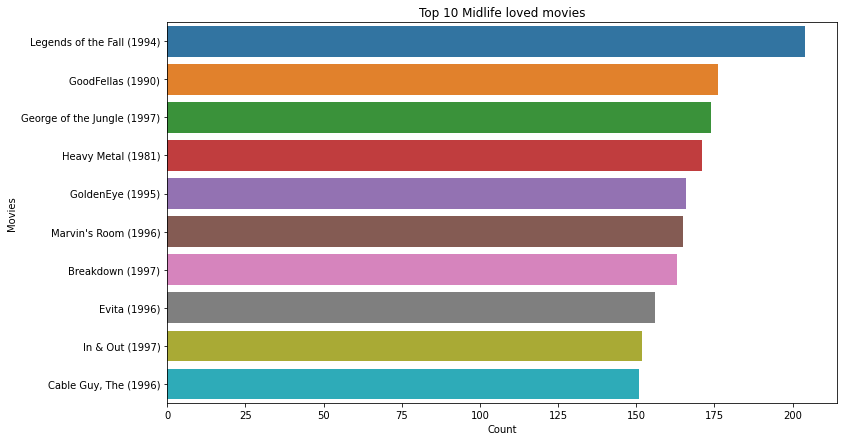

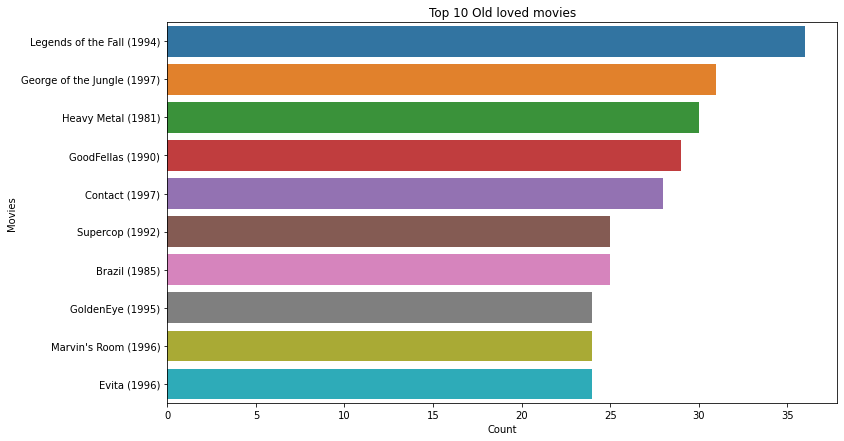

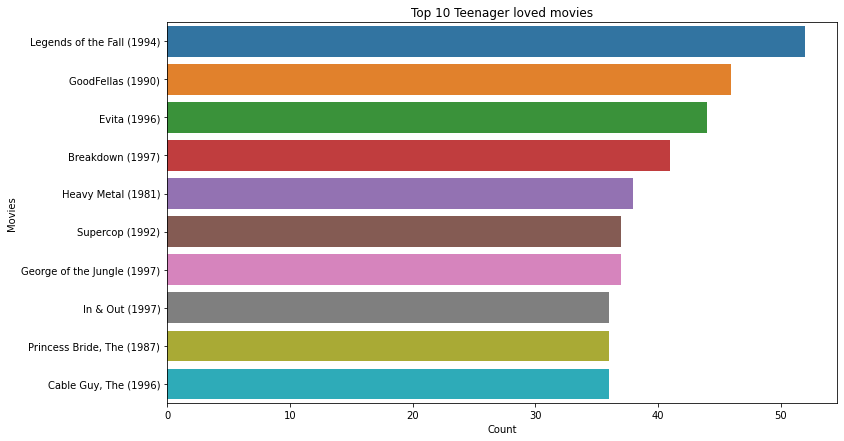

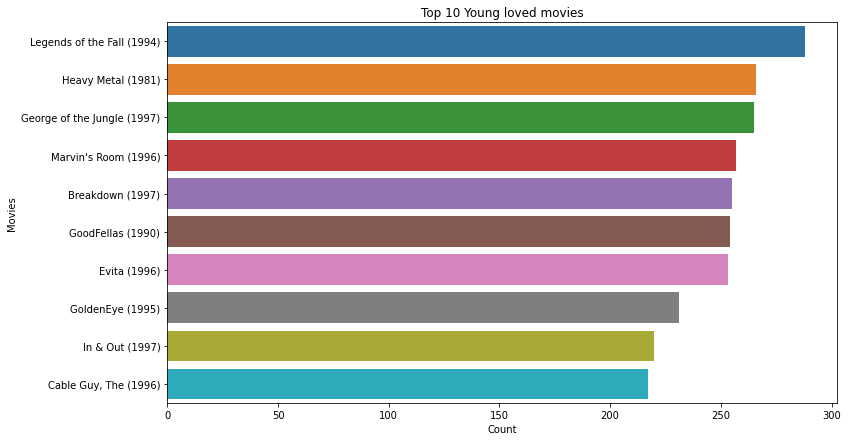

In [ ]:
most_loved_movies_age_group_wise = rating_user_movie_df.groupby(['age_group','movie_id']).sum().rating

for index_label in most_loved_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_loved_movies = top_rated_movies_age_group_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = movie_df.iloc[top_10_userkind_loved_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 {index_label} loved movies')

### <a id='QD4'>Worst movies as per user rating.</a>

In [ ]:
rating_df.columns, 

(Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object'),)

In [ ]:
top_users_g = rating_df.groupby('user_id')['rating'].count()
top_users = top_users_g.sort_values(ascending=False)[:15]
top_movies_g = rating_df.groupby('movie_id')['rating'].count()
top_movies = top_movies_g.sort_values(ascending=False)[:15]
top_users_movies = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')
top_users_movies = top_users_movies.join(top_movies, rsuffix='_r', how='inner', on='movie_id')

In [ ]:
rating_df.shape, top_users_movies.shape

((100000, 4), (190, 6))

Ratings record drastically came down after applying top-n user and movie filters. Let's check what these movies and users are:

In [ ]:
top_users_movies.user_id.unique(), top_users_movies.movie_id.unique()

(array([303, 234, 276,   7,  13, 279, 393, 405, 416, 429, 450, 537, 655,
        846, 181]),
 array([181, 288, 294, 300, 286, 258,  50, 100,  56,  98, 127, 174,   1,
        121,   7]))

Top movies picked by top users:

In [ ]:
top_users_df = user_df[user_df.user_id.isin(top_users_movies.user_id.unique())]
top_movies_df = movie_df[movie_df.movie_id.isin(top_users_movies.movie_id.unique())]
top_movies_df

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49,50,Star Wars (1977),1977-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
55,56,Pulp Fiction (1994),1994-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97,98,"Silence of the Lambs, The (1991)",1991-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99,100,Fargo (1996),1997-02-14,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
120,121,Independence Day (ID4) (1996),1996-07-03,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
126,127,"Godfather, The (1972)",1972-01-01,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
173,174,Raiders of the Lost Ark (1981),1981-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,181,Return of the Jedi (1983),1997-03-14,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
pd.crosstab(top_users_movies.user_id, top_users_movies.movie_id, top_users_movies.rating, aggfunc=np.sum)

movie_id,1,7,50,56,98,100,121,127,174,181,258,286,288,294,300
user_id,,,,,,,,,,,,,,,
7,NaN,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,4.0
13,3.0,2.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,1.0,2.0,1.0
181,3.0,4.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,3.0,1.0,4.0,2.0,3.0
234,3.0,2.0,4.0,3.0,4.0,4.0,NaN,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
276,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,4.0,4.0,4.0
279,3.0,5.0,3.0,4.0,NaN,4.0,4.0,NaN,4.0,3.0,NaN,NaN,3.0,2.0,NaN
303,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,1.0
393,3.0,4.0,5.0,2.0,NaN,1.0,4.0,NaN,NaN,4.0,4.0,NaN,3.0,4.0,NaN
405,NaN,NaN,5.0,4.0,4.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN,5.0,NaN,NaN


The user/movie fields are currently non-sequential integers representing some unique ID for that entity. We need them to be sequential starting at zero

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
user_enc = LabelEncoder()
rating_df['user'] = user_enc.fit_transform(rating_df['user_id'].values)
n_users = rating_df['user'].nunique()

item_enc = LabelEncoder()
rating_df['movie'] = item_enc.fit_transform(rating_df['movie_id'].values)
n_movies = rating_df['movie'].nunique()

rating_df['rating'] = rating_df['rating'].values.astype(np.float32)

min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])

n_users, n_movies, min_rating, max_rating

(943, 1682, 1.0, 5.0)

In [ ]:
# train/test split
X = rating_df[['user', 'movie']].values
y = rating_df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90000, 2), (90000,), (10000, 2), (10000,))

## Collaborative filtering method using surprise package

In [ ]:
!pip install surprise
import os
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ratings = pd.read_csv('/content/gdrive/MyDrive/Datamining/data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)
df.shape

(100836, 3)

To load a data set from the above pandas data frame, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified.

The data frame must have three columns, corresponding to the user ids, the item ids, and the ratings in this order.

In [ ]:
# Define the format
reader = Reader(line_format='user item rating timestamp', sep='\t')

reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# Split data into 5 folds

#data.split(n_folds=5)

## EDA
### Have to define a function to use plotly 3.X versions

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Ratings Distribution

In [ ]:
configure_plotly_browser_state()

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Ratings Distribution By Item

In [ ]:
configure_plotly_browser_state()


data = df.groupby('itemID')['rating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
df.groupby('itemID')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,itemID,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
224,260,251
418,480,238
97,110,237
507,589,224
461,527,220


### Ratings Distribution By User

In [ ]:
configure_plotly_browser_state()

data = df.groupby('userID')['rating'].count().clip(upper=80)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
df.groupby('userID')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,userID,rating
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346
609,610,1302
67,68,1260
379,380,1218
605,606,1115
287,288,1055


The minimumn number of ratings given by a user is 20, where as the most productive user is user-414 giving 2698 rating.
The data is properly distributed and the big chunk of ratings is between 3 and 5 which means people are not very hard towards rating

# Surprise - Model Selection


Surprise is a Python scikit building and analyzing recommender systems that 

*   List item
*   List item

deal with explicit rating data.

In [ ]:
!pip install numpy
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here are the average RMSE, MAE and total execution time of various algorithms **(with their default parameters)** on a **3-fold** cross-validation procedure.

<font color=red> We will use __RMSE__ as our accuracy metric for the predictions. </font>

We will be comparing SVD, NMF, Normal Predictor, KNN Basic and will be using the one which will have least RMSE value.

1: Normal Predictor: It predicts a random rating based on the distribution of the training set, which is assumed to be normal.
It's a basic algorithm that does not do much work but that is still useful for comparing accuracies.

2: SVD:It got popularized by Simon Funk during the Netflix prize and is a Matrix Factorized algorithm. If baselines are not used, it is equivalent to PMF.

3: NMF:It is based on Non-negative matrix factorization and is similar to SVD.

4: KNN Basic:This is a basic collaborative filtering algorithm method.

In [ ]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.880144,1.333710,0.238265
NMF,0.935808,2.624420,0.206252
KNNBasic,0.960710,0.105917,2.513958
NormalPredictor,1.422875,0.124410,0.258974


# Tunining algorithm parameters with <font color = red> GridSearchCV </font> to find the best parameters for the algorithm.

Default values for svd( ):

n_factors - 100   
n_epochs - 20   
lr_all – 0.005   
reg_all – 0.02 

In [ ]:
param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

0.8679533941443279
{'n_factors': 40, 'n_epochs': 25, 'lr_all': 0.008, 'reg_all': 0.08}


# Training and Testing 

We use the **train_test_split()** to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. 

We’ll then use the **fit()** method which will train the algorithm on the trainset, and the **test()** method which will return the predictions made from the testset

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8666


0.866645407693834

#### check how good or bad our predictions are:
The following function will create a pandas data frame which will consist of these columns:

**UID:** user-id

**iid:** item id

**Rui:** the rating given by the user

**est:** rating estimated by the model

**Iu:** No of items rated by the user

**UI:** number of users that have rated this item

**err:** abs difference between predicted rating and the actual rating.

In [ ]:
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [ ]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,474,4019,4.0,3.508487,{'was_impossible': False},1555,20,0.491513
1,607,1097,5.0,4.002127,{'was_impossible': False},141,99,0.997873
2,43,480,4.0,4.899931,{'was_impossible': False},89,168,0.899931
3,599,2583,2.5,3.247922,{'was_impossible': False},1916,6,0.747922
4,414,157699,4.0,3.687137,{'was_impossible': False},1995,4,0.312863


### The 10 best and worst predictions our model made

In [ ]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
21251,30,318,5.0,5.0,{'was_impossible': False},27,234,0.0
19590,251,1225,5.0,5.0,{'was_impossible': False},17,57,0.0
11545,43,29,5.0,5.0,{'was_impossible': False},89,23,0.0
11296,53,1982,5.0,5.0,{'was_impossible': False},16,15,0.0
20408,122,1276,5.0,5.0,{'was_impossible': False},215,41,0.0
23278,171,296,5.0,5.0,{'was_impossible': False},62,232,0.0
2330,523,4973,5.0,5.0,{'was_impossible': False},62,91,0.0
12054,122,2160,5.0,5.0,{'was_impossible': False},215,26,0.0
12954,523,5618,5.0,5.0,{'was_impossible': False},62,60,0.0
17894,122,1199,5.0,5.0,{'was_impossible': False},215,44,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
13118,573,1127,0.5,4.198074,{'was_impossible': False},216,49,3.698074
18225,594,5909,0.5,4.221337,{'was_impossible': False},156,4,3.721337
513,580,1262,0.5,4.252091,{'was_impossible': False},326,34,3.752091
21596,594,4902,0.5,4.317417,{'was_impossible': False},156,8,3.817417
12433,105,4027,0.5,4.391991,{'was_impossible': False},549,73,3.891991
22240,543,35836,0.5,4.534601,{'was_impossible': False},57,50,4.034601
19308,573,3996,0.5,4.555443,{'was_impossible': False},216,79,4.055443
18791,495,5952,0.5,4.620531,{'was_impossible': False},188,143,4.120531
14517,543,89904,0.5,4.707603,{'was_impossible': False},57,5,4.207603
19310,495,4993,0.5,4.811129,{'was_impossible': False},188,154,4.311129


look in more details of item "3996",  rated 0.5, our SVD algorithm predicts 4.4

In [ ]:
df.loc[df['itemID'] == 3996]['rating'].describe()

count    110.000000
mean       3.836364
std        1.031853
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [ ]:
temp = df.loc[df['itemID'] == 3996]['rating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

It turns out, most of the ratings this Item received between "3 and 5",only 1% of the users rated "0.5" and one "2.5"below 3. It seems that for each prediction, the users are some kind of outliers and the item has been rated very less number of times.

# **K Recommendations**

## Recall and precision at K
Recall and precision are the classical evaluation metric and are used to evaluate the binary metric and so we have to convert our rating which is scaled from (1-5) into a binary problem relevant and not relevant items.

## Conversion to binary
To do the translation we have to select an arbitrary value on which we can say any rating above that will be considered relevant. There are many methods on selecting that value but for now, we will select 3.5 as the threshold, which means any true rating above 3.5 will be considered relevant and below will be not relevant.

## Deciding 'k'
In recommendation systems, we are interested in showing the top N items to users and so the best is to compute precision and recall on top N values instead of calculating on all the items.

## Definition of Relevant and Recommended
**Relevant:** True Rating > = 3.5

**Irrelevant:** True Rating < 3.5

**Recommended item:** Predicted Rating > = 3.5

**Not Recommended item:** Predicted Rating > = 3.5


## Definition of Precision and Recall
**Precision:** It tries to answer "What proportion of positive identifications was actually correct?"
i.e True positive / (True positive+False Positive)
in RecSys we can say (# of recommended items @k that are relevant) / (# of recommended items @k)

**Recall:** It tries to answer "What proportion of actual positives were identified correctly?"
i.e True positive / (True Positive+False Negative)
in RecSys we can say (# of recommended items @k that are relevant) / (# of relevant items @k)

**While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.**

In some circumstances, we might know that we need to maximize either **recall** or **precision** at the cost of the other metric. For example, in disease screening of patients, we would probably want a recall near 1.0 i.e. we want to find all patients who have the disease. 

However, in cases where we want to obtain an optimal blend of precision and recall, we can use **F1** score which is the harmonic mean of precision and recall taking both metrics into account while calculating it.

**f1 score = 2 * (precision * recall) / (precision + recall)**

In [ ]:
#Calculate TP,FP,TN,FN at every threshold level (0.0 - 5.0)

final = []

for threshold in np.arange(0, 5.5, 0.5):
  tp=0
  fn=0
  fp=0
  tn=0
  temp = []

  for uid, _, true_r, est, _ in predictions:
    if(true_r>=threshold):
      if(est>=threshold):
        tp = tp+1
      else:
        fn = fn+1
    else:
      if(est>=threshold):
        fp = fp+1
      else:
        tn = tn+1   

    if tp == 0:
      precision = 0
      recall = 0
      f1 = 0
    else:
      precision = tp / (tp + fp)
      recall = tp / (tp + fn)
      f1 = 2 * (precision * recall) / (precision + recall)  

  temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
  final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,25209,0,0,0,1.000000,1.000000,1.000000
1,0.5,25209,0,0,0,1.000000,1.000000,1.000000
2,1.0,24876,332,1,0,0.986830,1.000000,0.993371
3,1.5,24141,1055,8,5,0.958128,0.999793,0.978517
4,2.0,23624,1410,94,81,0.943677,0.996583,0.969408
5,2.5,21365,2711,672,461,0.887398,0.978878,0.930896
6,3.0,18378,2455,2259,2117,0.882158,0.896707,0.889373
7,3.5,10829,2780,6999,4601,0.795723,0.701815,0.745825
8,4.0,4081,866,12171,8091,0.824944,0.335278,0.476780
9,4.5,450,198,19564,4997,0.694444,0.082614,0.147662


As per the results above, the optimal value for threshold is **2.5**.

The next step is to find the optimal K value, and to find it we have to first calculate precision and recall for all the K values(2-10) having threshold value 2.5.

Below is the function to calculate **precision and recall @ K.**

In [ ]:
def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    #tp = n_rel_and_rec_k
    #fn =  n_rel - tp
    #fp = n_rec_k - tp
    return precisions, recalls

In [ ]:
results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.9393442622950819, 'Recall': 0.17699655734991693},
 {'K': 3, 'Precision': 0.9379781420765029, 'Recall': 0.2563779251889864},
 {'K': 4, 'Precision': 0.9334699453551916, 'Recall': 0.32709681220710685},
 {'K': 5, 'Precision': 0.9324043715847, 'Recall': 0.3901386860763769},
 {'K': 6, 'Precision': 0.9271038251366118, 'Recall': 0.4416189073640545},
 {'K': 7, 'Precision': 0.92366900858704, 'Recall': 0.48784459416973647},
 {'K': 8, 'Precision': 0.9224102263856361, 'Recall': 0.5281360021416203},
 {'K': 9, 'Precision': 0.9209302628155098, 'Recall': 0.5611171358912649},
 {'K': 10, 'Precision': 0.9205841790268008, 'Recall': 0.5900254576921105}]

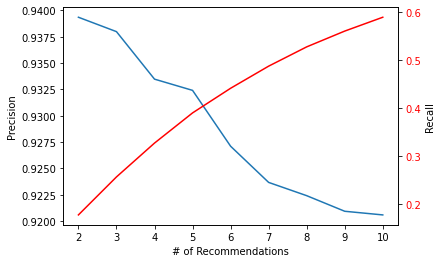

In [ ]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

As the graph states, Precision drops significantly when K=4

So we will consider the value of K to be 4.

### Now as we know the optimal number of recommendations to provie, it's time to give recommendations to users. To do so we have to predict ratings for the movies which user has not yet watched.

Here we will be using **build_anti_testset()** method to get the data for testset as we have to predict ratings for the (user, item) pairs which are not present.

In [ ]:
#data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()   #Build on entire data set
algo = SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value)
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

#Predicting the ratings for testset
predictions = algo.test(testset)

Below is the function to get all the prediction sorted.

In [ ]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
all_pred = get_all_predictions(predictions)

#### As we have all the predicted rating, We'll subset to only top **K** movies for every user, where K is 4

In [ ]:
#To get top 4 reommendation
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

#### Now we have a dataframe which consits of top 4 movies recommended to every user.<br> Let's try one example and find recommendations for user 67

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
user_id=67
results = get_predictions(user_id)
results

0      (3451, 4.493472399512836)
1    (177593, 4.480792852843234)
2      (1178, 4.418344443960747)
3       (951, 4.402400047080434)
Name: 67, dtype: object

#### Above matrix is showing top "4" recommendations for user 67. (Movie-id,  Predicted-Rating).<br> But we just need the movies not the ratings, so let's extract the movie id's from the result.

In [ ]:
recommended_movie_ids=[]
for x in range(0, n):
    recommended_movie_ids.append(results[x][0])

recommended_movie_ids

[3451, 177593, 1178, 951]

#### Now as we have the movie-id's to be recommended, Let's find out the movie details of those id's by reading the movie data.

In [ ]:
movies = pd.read_csv('/content/gdrive/MyDrive/Datamining/data/movies.csv')
movies.head()
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
recommended_movies

,movieId,title,genres
731,951,His Girl Friday (1940),Comedy|Romance
883,1178,Paths of Glory (1957),Drama|War
2582,3451,Guess Who's Coming to Dinner (1967),Drama
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama


Lets check the user history to see wether the given recommendations are similar or not

In [ ]:
ratings = pd.read_csv('/content/gdrive/MyDrive/Datamining/data/ratings.csv')
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)
df.head()

,itemID,userID,rating
0,1,1,4.0
1,3,1,4.0
2,6,1,4.0
3,47,1,5.0
4,50,1,5.0


In [ ]:
temp = df[df['userID'] == 67].sort_values("rating", ascending = False)
temp.head()

,itemID,userID,rating
10324,293,67,5.0
10352,8604,67,5.0
10332,1527,67,5.0
10354,27193,67,5.0
10343,4886,67,4.5


In [ ]:
temp.shape

(36, 3)

In [ ]:
history_movie_ids = temp['itemID']
user_history = movies[movies['movieId'].isin(history_movie_ids)]

In [ ]:
user_history[:n]

,movieId,title,genres
254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


####Now we can compare the results with the user history and see how relevant the recommendations are.
####Above is the user history and below the recommended movies

In [ ]:
recommended_movies

,movieId,title,genres
731,951,His Girl Friday (1940),Comedy|Romance
883,1178,Paths of Glory (1957),Drama|War
2582,3451,Guess Who's Coming to Dinner (1967),Drama
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama


# As the history of the user tells that the user mostly likes Drama movies and we are recommending all the Drama movies, which means we are recommending the right movies to the user.

# So Our model works fine.

> Indented block

